# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [62]:
# student 1: Tomer 5323
# student 2: Amiram 1317
# student 3: Roni 0502


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
AI agent name: ChatGPT (OpenAI o4-mini)
Goal:Refine and debug Part 3 (Experiments) of the Titanic ML workflow: ensure all feature-engineering is inside cross-validation, fix imports, and streamline the GridSearchCV setup.

Prompt 1:
How can I build a scikit-learn Pipeline so that imputation, scaling and one-hot encoding are fit only on each train_fold and then applied on the corresponding validation_fold within cross_val_score, to avoid any data leakage?

Prompt 2:
I‚Äôm getting NameError: name 'OneHotEncoder' is not defined. Which exact import statement am I missing, and where should I place it at the top of my notebook?


Prompt 3:
Instead of manually looping over my 'use_family' and 'use_age' flags, how can I include these boolean feature-engineering options directly in GridSearchCV‚Äôs param_grid (using a FunctionTransformer) so that it automatically tests all combinations alongside the model hyperparameters?


Other assistanse:    
‚Ä¢ Consulted the official scikit-learn docs for Pipeline, ColumnTransformer, FunctionTransformer and GridSearchCV.

<pre></pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:


We‚Äôre trying to predict whether a Titanic passenger survived (the Survived column).
The training set contains 712 samples with features like Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, etc., plus the Survived label.
The test set contains 179 samples with the same features (Survived hidden).
Our goal is to run combined experiments of feature engineering (e.g., creating FamilySize and AgeCategory), algorithms (e.g., KNN, Decision Tree) and hyperparameter tuning using 5-Fold Cross-Validation and Grid Search, to identify the combination that maximizes f1_macro while preventing data leakage between training and validation.

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [70]:
# ◊ò◊¢◊ô◊†◊™ ◊°◊§◊®◊ô◊ï◊™ ◊ï◊ß◊®◊ô◊ê◊™ ◊ß◊ï◊ë◊• ◊î-Train
import pandas as pd
import matplotlib.pyplot as plt

trainset = pd.read_csv("titanic_train.csv")
trainset.head()   # ◊î◊¶◊í◊î ◊©◊ú ◊ó◊û◊© ◊î◊©◊ï◊®◊ï◊™ ◊î◊®◊ê◊©◊ï◊†◊ï◊™ 


Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

In [71]:
#◊ß◊®◊ô◊ê◊™ ◊ß◊ï◊ë◊• ◊î-test set 
testset = pd.read_csv("titanic_test.csv")
testset.head()    # ◊ó◊û◊© ◊î◊©◊ï◊®◊ï◊™ ◊î◊®◊ê◊©◊ï◊†◊ï◊™ ◊û◊™◊ï◊ö ◊î-testset


Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1

In [72]:
# ◊î◊¶◊í◊™ ◊°◊ô◊õ◊ï◊ù ◊°◊ò◊ò◊ô◊°◊ò◊ô (◊°◊§◊ô◊®◊î, ◊û◊û◊ï◊¶◊¢, ◊°◊ò◊ô◊ô◊™ ◊™◊ß◊ü, ◊®◊ë◊¢◊ï◊†◊ô◊ù ◊ï◊õ◊ï') ◊¢◊ú ◊î-trainset
trainset.describe()


Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000000    1.000000

In [73]:
# ◊î◊¶◊í◊î ◊ò◊ë◊ú◊ê◊ô◊™ 2
# ◊î◊¶◊í◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™, ◊ò◊ô◊§◊ï◊° ◊î◊†◊™◊ï◊†◊ô◊ù ◊ë◊õ◊ú ◊¢◊û◊ï◊ì◊î, ◊ï◊õ◊û◊î ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊î
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [74]:
# ◊î◊¶◊í◊î ◊ò◊ë◊ú◊ê◊ô◊™ 3
# ◊ó◊ô◊©◊ï◊°◊ë ◊û◊ò◊®◊ô◊¶◊™ ◊î◊û◊ß◊ì◊û◊ô◊ù, ◊©◊ñ◊ï ◊û◊ò◊®◊ô◊¶◊î ◊î◊û◊ï◊ì◊ì◊™ ◊ê◊™ ◊î◊ß◊©◊® ◊î◊ú◊ô◊†◊ê◊®◊ô ◊ë◊ô◊ü ◊©◊†◊ô ◊û◊©◊™◊†◊ô◊ù
#◊î◊¢◊®◊õ◊ô◊ù ◊†◊¢◊ô◊ù ◊ë◊ô◊ü 1 ◊ú1- ◊õ◊ö ◊©: 1 ◊û◊¶◊ë◊ô◊¢ ◊¢◊ú ◊ß◊©◊® ◊ó◊ô◊ï◊ë◊ô ◊û◊ï◊©◊ú◊ù, 1- ◊¢◊ú ◊ß◊©◊® ◊©◊ú◊ô◊ú◊ô ◊û◊ï◊©◊ú◊ù ◊ï-0 ◊¢◊ú ◊ó◊ï◊°◊® ◊ß◊©◊®

corr_matrix = trainset.corr()
corr_matrix

Pclass       Sex       Age     SibSp     Parch      Fare  \
Pclass    1.000000  0.126986 -0.319927  0.093572  0.048225 -0.543722   
Sex       0.126986  1.000000  0.089108 -0.079976 -0.242467 -0.183650   
Age      -0.319927  0.089108  1.000000 -0.270404 -0.202725  0.071787   
SibSp     0.093572 -0.079976 -0.270404  1.000000  0.415491  0.136861   
Parch     0.048225 -0.242467 -0.202725  0.415491  1.000000  0.151631   
Fare     -0.543722 -0.183650  0.071787  0.136861  0.151631  1.000000   
Embarked  0.040708 -0.124908  0.031524 -0.049109 -0.072698  0.078197   
Survived -0.324024 -0.550699 -0.072729 -0.031052  0.074699  0.264345   

          Embarked  Survived  
Pclass    0.040708 -0.324024  
Sex      -0.124908 -0.550699  
Age       0.031524 -0.072729  
SibSp    -0.049109 -0.031052  
Parch    -0.072698  0.074699  
Fare      0.078197  0.264345  
Embarked  1.000000  0.099162  
Survived  0.099162  1.000000

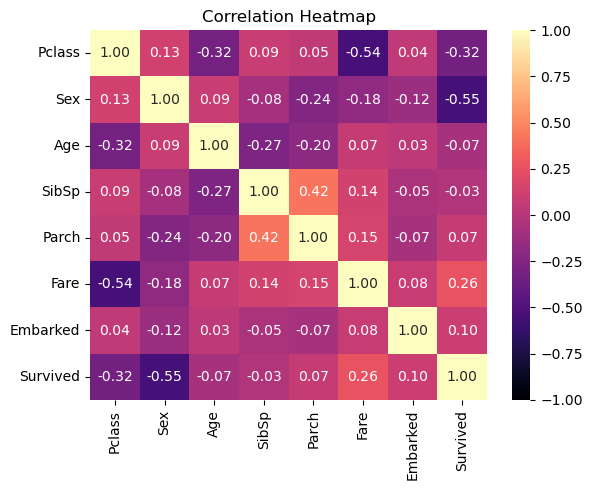

In [75]:
# ◊î◊¶◊í◊î ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊™ 1 
#◊ô◊¶◊ô◊®◊™ ◊û◊§◊™ ◊ó◊ï◊ù ◊ú◊û◊ò◊®◊ô◊¶◊™ ◊î◊û◊™◊ê◊ù
#◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊õ◊ê◊ü ◊©◊¢◊ë◊ï◊® ◊î◊¶◊ë◊¢ ◊¶◊î◊ï◊ë ◊ë◊î◊ô◊®- ◊î◊™◊ß◊©◊® ◊û◊ï◊©◊ú◊ù ◊õ◊ô ◊ñ◊î ◊û◊©◊™◊†◊î ◊û◊ï◊ú ◊¢◊¶◊û◊ï
#◊í◊ï◊ï◊†◊ô◊ù ◊ê◊ì◊ï◊ù ◊õ◊™◊ï◊ù ◊û◊®◊ê◊ô◊ù ◊¢◊ú ◊ß◊©◊® ◊ó◊ô◊ï◊ë◊ô
#◊í◊ï◊ï◊†◊ô◊ù ◊õ◊ó◊ï◊ú◊ô◊ù ◊õ◊î◊ô◊ù-◊©◊ó◊ï◊®◊ô◊ù ◊û◊®◊ê◊ô◊ù ◊¢◊ú ◊ß◊©◊® ◊©◊ú◊ô◊ú◊ô
#◊í◊ï◊ï◊ü ◊°◊í◊ï◊ú-◊ï◊®◊ï◊ì ◊û◊¶◊ë◊ô◊¢ ◊¢◊ú ◊ó◊ï◊°◊® ◊ß◊©◊®

plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Continuous Variables - before scaling...')

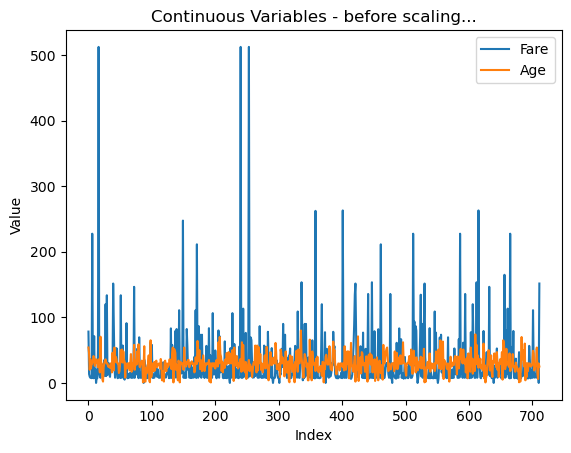

In [76]:
# ◊î◊¶◊í◊î ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊™ 2 
# ◊î◊†◊™◊ï◊†◊ô◊ù ◊ë◊¢◊ú◊ô ◊¢◊®◊ö ◊®◊¶◊ô◊£ ◊ï◊ë◊ò◊ï◊ï◊ó◊ô◊ù ◊ß◊ô◊¶◊ï◊†◊ô◊ô◊ù ◊ë◊ô◊ü ◊¢◊û◊ï◊ì◊ï◊™
#◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊©◊î◊í◊®◊£ ◊ß◊©◊î ◊ú◊ß◊®◊ô◊ê◊î ◊ï◊†◊ô◊™◊ï◊ó ◊î◊†◊™◊ï◊†◊ô◊ù ◊õ◊ö ◊¢◊ú◊ï◊ú ◊ú◊§◊í◊ï◊¢ ◊ë◊™◊ï◊¶◊ê◊ï◊™ ◊î◊†◊ô◊°◊ï◊ô◊ô◊ù
#◊ë◊î◊û◊©◊ö ◊†◊®◊ê◊î ◊ê◊™ ◊î◊í◊®◊£ ◊©◊ï◊ë, ◊ú◊ê◊ó◊® ◊ë◊ô◊¶◊ï◊¢ ◊°◊ß◊ê◊ú◊ô◊†◊í

continuous_columns = ['Fare','Age']
trainset[continuous_columns].plot()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Continuous Variables - before scaling...')

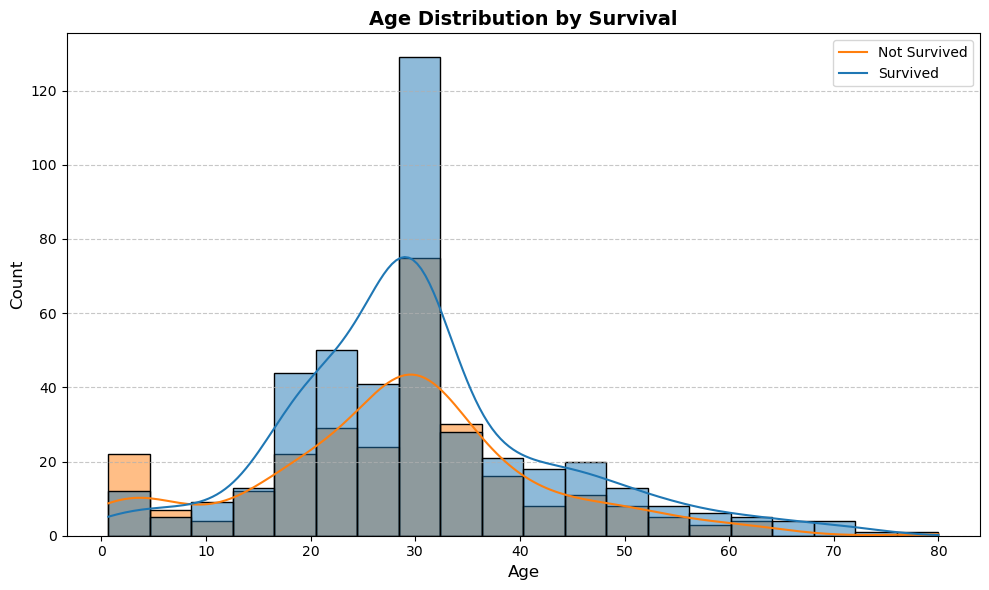

In [77]:
# ◊î◊¶◊í◊î ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊™ 3 
#◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊î◊™◊§◊ú◊í◊ï◊™ ◊í◊ô◊ú ◊î◊†◊ï◊°◊¢◊ô◊ù ◊ú◊§◊ô ◊î◊ô◊©◊®◊ì◊ï◊™◊ù
#◊†◊ô◊™◊ï ◊ú◊®◊ê◊ï◊™ ◊©◊®◊ï◊ë ◊î◊†◊ï◊°◊¢◊ô◊ù ◊©◊ú◊ê ◊©◊®◊ì◊ï ◊î◊ô◊ê ◊ë◊ß◊ë◊ï◊¶◊™ ◊î◊í◊ô◊ú◊ê◊ô◊ù 20-30 ◊ï◊î◊†◊ï◊°◊¢◊ô◊ù ◊©◊©◊®◊ì◊ï ◊î◊ô◊ï ◊ë◊¢◊ô◊ß◊® ◊ë◊†◊ô 20-40
plt.figure(figsize=(10, 6))
sns.histplot(data=trainset, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Age Distribution by Survival', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Not Survived', 'Survived'])
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [79]:
#◊ë◊ì◊ô◊ß◊™ ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù
# ◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊©◊ê◊ô◊ü ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊í◊ù ◊ë◊ò◊®◊ô◊ô◊ü-◊°◊ò ◊ï◊í◊ù ◊ë◊ò◊°◊ò-◊°◊ò, ◊ï◊ú◊õ◊ü ◊ê◊ô◊ü ◊¶◊ï◊®◊ö ◊ë◊ò◊ô◊§◊ï◊ú ◊ë◊î◊ù

missing_train = trainset.isnull().sum()
missing_test = trainset.isnull().sum()

print(missing_train) 
print('\n')
print(missing_test)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [80]:

# ◊§◊ï◊†◊ß◊¶◊ô◊ô◊™ Feature Engineering ◊î◊û◊ï◊°◊ô◊§◊î ◊¢◊û◊ï◊ì◊ï◊™ FamilySize ◊ï÷æAgeCategory

def add_features(df, use_family=True, use_age=True):
    df = df.copy()
    if(use_family):
        #   ◊î◊ï◊°◊§◊™ ◊¢◊û◊ï◊ì◊î ◊©◊ú ◊û◊°◊§◊® ◊ë◊†◊ô ◊î◊û◊©◊§◊ó◊î 
        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
        
    if(use_age):
        #   ◊ô◊¶◊ô◊®◊™ ◊¢◊û◊ï◊ì◊î ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊™ ◊ú◊§◊ô ◊¢◊û◊ï◊ì◊™ ◊í◊ô◊ú ◊ë◊ò◊®◊ô◊ô◊ü-◊°◊ò
        bins = [0, 12, 18, 30, 50, 200] ## ◊î◊í◊ì◊®◊™ ◊í◊ë◊ï◊ú◊ï◊™ ◊¢◊ë◊ï◊® ◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ ◊î◊í◊ô◊ú
        labels = [1, 2, 3, 4, 5]
        df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels).astype(float)
        
    return df

feature_engineering = FunctionTransformer(add_features)

In [81]:
# ◊ó◊ú◊ï◊ß◊î ◊ú◊û◊ê◊§◊ô◊ô◊†◊ô◊ù (X) ◊ï◊ú◊™◊ï◊ï◊ô◊ï◊™ (y)
# ============================
# ◊õ◊ê◊ü ◊ê◊†◊ó◊†◊ï ◊ë◊ï◊ó◊®◊ô◊ù ◊ê◊ô◊ú◊ï ◊¢◊û◊ï◊ì◊ï◊™ ◊ô◊©◊û◊©◊ï ◊õ◊ß◊ú◊ò (features)
# ◊ï◊ê◊ô◊ú◊ï ◊ô◊©◊û◊©◊ï ◊õ◊ô◊¢◊ì (Survived: ◊î◊ê◊ù ◊†◊ô◊¶◊ú/◊î).
X_train = trainset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = trainset['Survived']
X_test = testset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
y_test = testset['Survived']

results = []

In [82]:
# ◊ß◊ë◊ô◊¢◊™ ◊õ◊ú ◊ß◊ï◊û◊ë◊ô◊†◊¶◊ô◊ï◊™ Feature Engineering
# ============================
# ◊ê◊®◊ë◊¢ ◊ê◊§◊©◊®◊ï◊ô◊ï◊™: ◊ú◊ú◊ê ◊î◊ï◊°◊§◊™ ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù, ◊õ◊ú ◊ê◊ó◊ì ◊ú◊ó◊ï◊ì, ◊ê◊ï ◊©◊†◊ô◊î◊ù ◊ô◊ó◊ì
features_eng_permotations = [
    {'use_family': False, 'use_age': False},
    {'use_family': True, 'use_age': False},
    {'use_family': False, 'use_age': True},
    {'use_family': True, 'use_age': True},
]
# ◊ß◊ë◊ô◊¢◊™ ◊®◊©◊ô◊û◊™ ◊î◊û◊ï◊ì◊ú◊ô◊ù ◊ï◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊ú◊ë◊ì◊ô◊ß◊î
models = [
    ("KNN", KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7,9], #◊†◊ë◊ì◊ï◊ß ◊õ◊ê◊©◊® ◊ô◊©-3,5,7,9 ◊©◊õ◊†◊ô◊ù
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    }),
    ("Decision Tree", DecisionTreeClassifier(), {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    })
]

In [83]:
# ◊î◊®◊¶◊™ ◊î◊†◊ô◊°◊ï◊ô◊ô◊ù ◊î◊û◊®◊õ◊ñ◊ô◊ô◊ù ◊¢◊ù GridSearchCV
# ============================
# ◊¢◊ë◊ï◊® ◊õ◊ú ◊™◊¶◊ï◊®◊™ FE ◊ï◊ú◊õ◊ú ◊û◊ï◊ì◊ú:
# 1. ◊û◊ï◊°◊ô◊§◊ô◊ù ◊ê◊™ ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù (add_features)
# 2. ◊ë◊ï◊†◊ô◊ù ◊§◊®◊ï◊°◊°◊ï◊® (ColumnTransformer) ◊ú◊ò◊ô◊§◊ï◊ú ◊ë◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ï◊ë-scaling
# 3. ◊û◊®◊ô◊¶◊ô◊ù GridSearchCV ◊¢◊ù 5-fold CV ◊¢◊ú f1_macro
# 4. ◊©◊ï◊û◊®◊ô◊ù ◊ê◊™ ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊ú◊ò◊ë◊ú◊î
for features in features_eng_permotations:

    X_new = add_features(X_train, **features)

    numerical = ['Age', 'Fare']
    categorical = ['Sex']

    if features['use_family']:
        numerical.append('FamilySize')
    if features['use_age']:
        numerical.append('AgeCategory')
        
  
    #  ◊î◊í◊ì◊®◊™ Preprocessor
    preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ]), numerical),
    
    ('cat', SimpleImputer(strategy='most_frequent'), categorical)
    ], remainder='passthrough')

    for name, model, model_params in models:
        pipe = Pipeline([
            ('preprocessing', preprocessor),
            ('classifier', model)
        ])
        # ◊ë◊ô◊¶◊ï◊¢ GridSearchCV ◊¢◊ù 5-fold Cross Validation ◊ú◊õ◊ú ◊û◊ï◊ì◊ú
        grid_search = GridSearchCV(pipe, param_grid=model_params, cv=5, scoring='f1', n_jobs=-1)
        grid_search.fit(X_new, y_train)

        results.append({
            "Model": name,
            "Features Config": features,
            "Best Parameters": grid_search.best_params_,
            "CV f1": grid_search.best_score_,
        })




results_df = pd.DataFrame(results)  # ◊î◊û◊®◊™ ◊î◊®◊©◊ô◊û◊î ◊ú◊ì◊ê◊ò◊î ◊§◊®◊ô◊ô◊ù
results_df = results_df.sort_values(by="CV f1", ascending=False).reset_index(drop=True)

# ◊°◊ô◊†◊ï◊ü ◊î◊©◊ï◊®◊î ◊¢◊ù ◊î◊¶◊ô◊ï◊ü ◊î◊õ◊ô ◊í◊ë◊ï◊î ◊ú◊õ◊ú ◊û◊ï◊ì◊ú
best_per_model = results_df.groupby("Model", as_index=False).first()
best_per_model = best_per_model.sort_values(by="CV f1", ascending=False).reset_index(drop=True)
# ◊î◊ì◊§◊°◊™ ◊î◊™◊ï◊¶◊ê◊î
best_per_model



Model                          Features Config  \
0            KNN   {'use_family': False, 'use_age': True}   
1  Decision Tree  {'use_family': False, 'use_age': False}   

                                     Best Parameters     CV f1  
0  {'classifier__metric': 'manhattan', 'classifie...  0.739960  
1  {'classifier__criterion': 'gini', 'classifier_...  0.738933

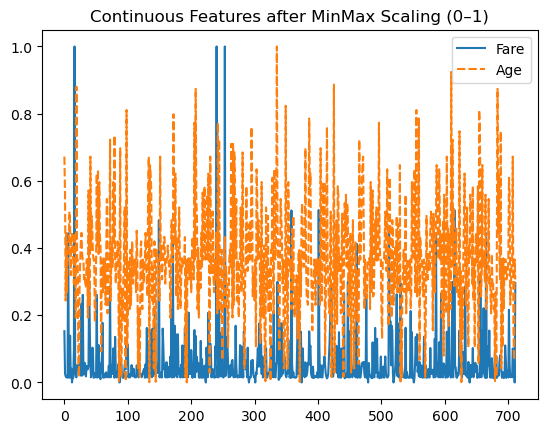

In [84]:
# ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î ◊ú◊ê◊ó◊® ◊°◊ß◊ê◊ú◊ô◊†◊í
#◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊©◊õ◊¢◊™ ◊î◊¢◊®◊õ◊ô◊ù ◊†◊¢◊ô◊ù ◊ë◊ô◊ü 0 ◊ú1
imputer = SimpleImputer(strategy="mean")
scaler  = MinMaxScaler()

tmp = trainset[['Fare','Age']].copy()
tmp[['Fare','Age']] = scaler.fit_transform(imputer.fit_transform(tmp[['Fare','Age']]))

sns.lineplot(data=tmp)
plt.title('Continuous Features after MinMax Scaling (0‚Äì1)')
plt.show()


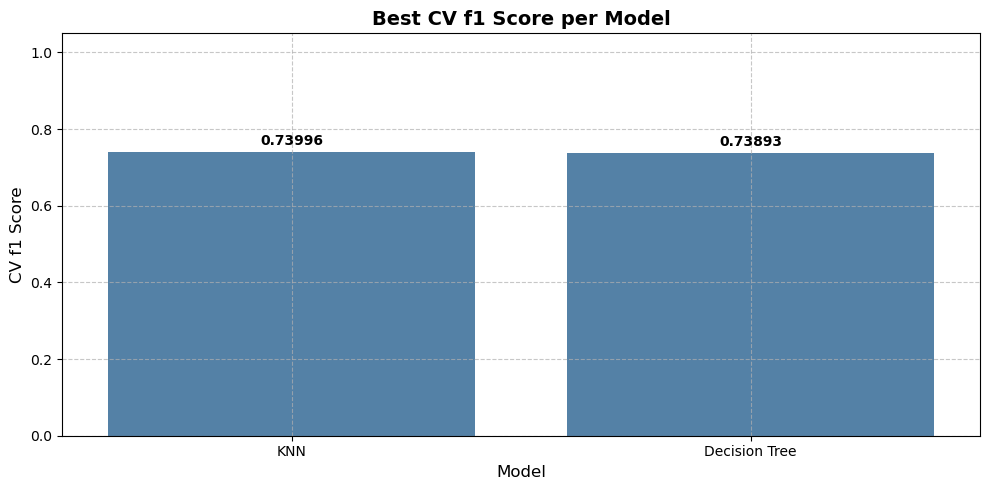

In [85]:
# 1. ◊ô◊¶◊ô◊®◊™ ◊§◊ô◊í◊ï◊®◊î ◊ó◊ì◊©◊î ◊¢◊ù ◊í◊ï◊ì◊ú ◊û◊™◊ê◊ô◊ù
plt.figure(figsize=(10, 5))

# 2. ◊í◊®◊£ ◊¢◊û◊ï◊ì◊ï◊™ ◊ú◊î◊¶◊í◊™ ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊î◊ò◊ï◊ë◊ï◊™ ◊ë◊ô◊ï◊™◊® ◊¢◊ë◊ï◊® CV F1 score

ax = sns.barplot(
    data=best_per_model,   # DataFrame ◊¢◊ù ◊¢◊û◊ï◊ì◊ï◊™ "Model" ◊ï-"CV f1"
    x="Model",             # ◊¢◊û◊ï◊ì◊™ ◊î◊û◊ï◊ì◊ú◊ô◊ù ◊¢◊ú ◊¶◊ô◊® ◊î-x
    y="CV f1",             # ◊¢◊û◊ï◊ì◊™ ◊î◊¶◊ô◊ï◊ü ◊¢◊ú ◊¶◊ô◊® ◊î-y
    color="steelblue"      # ◊¶◊ë◊¢ ◊ê◊ó◊ô◊ì ◊ú◊õ◊ú ◊î◊¢◊û◊ï◊ì◊ï◊™
)

# 3. ◊î◊ï◊°◊§◊™ ◊î◊¢◊®◊ï◊™ ◊ò◊ß◊°◊ò ◊û◊¢◊ú ◊õ◊ú ◊¢◊û◊ï◊ì◊î ◊ú◊î◊¶◊í◊™ ◊î◊¢◊®◊ö ◊ë◊ì◊ô◊ï◊ß
for i, row in best_per_model.iterrows():
    ax.text(
        x=i, 
        y=row["CV f1"] + 0.01,       
        s=f"{row['CV f1']:.5f}",   
        ha='center', 
        va='bottom', 
        fontweight='bold'
    )

# 4. ◊¢◊ô◊¶◊ï◊ë ◊õ◊ï◊™◊®◊ï◊™ ◊ï◊¶◊ô◊®◊ô ◊î◊í◊®◊£
plt.title("Best CV f1 Score per Model", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("CV f1 Score", fontsize=12)
plt.ylim(0, 1.05)         # ◊ß◊ë◊ô◊¢◊™ ◊ò◊ï◊ï◊ó ◊¶◊ô◊® ◊î-y ◊ë◊ô◊ü 0 ◊ú-1.05
plt.grid(True, linestyle='--', alpha=0.7)

# 5. ◊°◊í◊ô◊®◊î ◊ï◊î◊¶◊í◊î ◊©◊ú ◊î◊§◊®◊ô◊°◊î
plt.tight_layout()
plt.show()

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [87]:
# 1. ◊©◊ú◊ô◊§◊™ ◊î◊ß◊ï◊†◊§◊ô◊í◊ï◊®◊¶◊ô◊î (◊î◊û◊ï◊ì◊ú ◊î◊ò◊ï◊ë ◊ë◊ô◊ï◊™◊®) ◊î◊ò◊ï◊ë◊î ◊ë◊ô◊ï◊™◊®
best_config = results_df.iloc[0]
features = best_config["Features Config"]
model_name = best_config["Model"]
best_params = best_config["Best Parameters"]

# 2. ◊î◊ï◊°◊§◊™ ◊§◊ô◊¶'◊®◊ô◊ù ◊ú÷æ X_train ◊û◊ó◊ì◊© (◊õ◊ï◊ú◊ï)
X_final = add_features(X_train, **features)

numerical = ['Age', 'Fare']
categorical = ['Sex']

if features['use_family']:
    numerical.append('FamilySize')
if features['use_age']:
    numerical.append('AgeCategory')

# 3. ◊ô◊¶◊ô◊®◊™ preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ]), numerical),
    
    ('cat', SimpleImputer(strategy='most_frequent'), categorical)
], remainder='passthrough')

# 4. ◊ô◊¶◊ô◊®◊™ ◊î◊û◊ï◊ì◊ú ◊î◊®◊ú◊ï◊ï◊†◊ò◊ô
if model_name == "KNN":
    final_model = KNeighborsClassifier()
elif model_name == "Decision Tree":
    final_model = DecisionTreeClassifier()

# 5. ◊ô◊¶◊ô◊®◊™ pipeline ◊¢◊ù ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊©◊†◊ë◊ó◊®◊ï
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', final_model)
])


pipe.set_params(**best_params)

# 6. ◊ê◊ô◊û◊ï◊ü ◊¢◊ú ◊õ◊ú X_train
pipe.fit(X_final, y_train);




## Part 5 - Apply on test and show model performance estimation

In [89]:
# ◊î◊ï◊°◊§◊™ ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊ú◊ò◊°◊ò ◊ú◊§◊ô ◊î◊ß◊ï◊†◊§◊ô◊í◊ï◊®◊¶◊ô◊î ◊©◊†◊ë◊ó◊®◊î
X_test_final = add_features(X_test, **features)
y_pred = pipe.predict(X_test_final)

# ◊ó◊ô◊©◊ï◊ë ◊û◊ì◊ì◊ô◊ù
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

üìà ◊ë◊ô◊¶◊ï◊¢◊ô ◊î◊û◊ï◊ì◊ú ◊¢◊ú ◊ß◊ë◊ï◊¶◊™ ◊î◊ë◊ì◊ô◊ß◊î:


Metric     Value
0   Accuracy  0.837989
1  Precision  0.766667
2     Recall  0.754098
3   F1 Score  0.760331

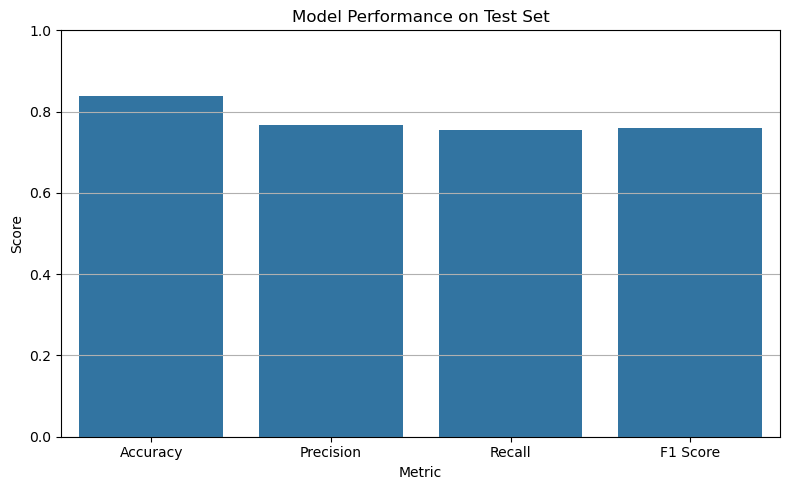

In [90]:
# ◊î◊¶◊í◊™ ◊ò◊ë◊ú◊™ ◊ë◊ô◊¶◊ï◊¢◊ô◊ù
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

print("üìà ◊ë◊ô◊¶◊ï◊¢◊ô ◊î◊û◊ï◊ì◊ú ◊¢◊ú ◊ß◊ë◊ï◊¶◊™ ◊î◊ë◊ì◊ô◊ß◊î:")
display(performance_df)


# ◊í◊®◊£ ◊ë◊ô◊¶◊ï◊¢◊ô◊ù
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value', data=performance_df)
plt.ylim(0, 1)
plt.title('Model Performance on Test Set')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [91]:
# ◊ò◊ë◊ú◊™ ◊ó◊ô◊ñ◊ï◊ô◊ô◊ù ◊ú◊¢◊ï◊û◊™ ◊ê◊û◊™
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)

print("üîç ◊î◊©◊ï◊ï◊ê◊™ ◊ó◊ô◊ñ◊ï◊ô◊ô◊ù ◊ú◊¢◊ï◊û◊™ ◊¢◊®◊õ◊ô◊ù ◊ê◊û◊ô◊™◊ô◊ô◊ù:")
display(predictions_df.head(20))

üîç ◊î◊©◊ï◊ï◊ê◊™ ◊ó◊ô◊ñ◊ï◊ô◊ô◊ù ◊ú◊¢◊ï◊û◊™ ◊¢◊®◊õ◊ô◊ù ◊ê◊û◊ô◊™◊ô◊ô◊ù:


Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          1
4        1          0
5        1          1
6        0          1
7        0          0
8        1          1
9        0          0
10       1          1
11       0          0
12       0          0
13       0          0
14       0          0
15       0          1
16       0          0
17       1          1
18       1          1
19       0          0

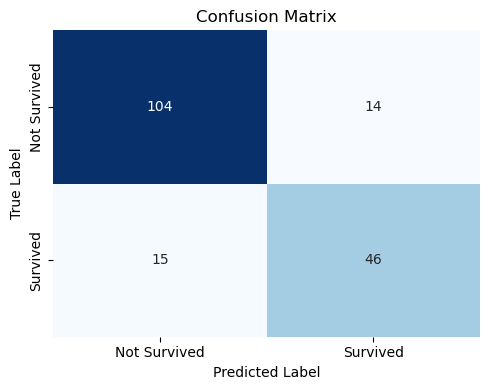

In [92]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()